# Complexplorer Tutorial: Domains and Color Maps

This tutorial provides a comprehensive guide to working with domains and color maps in complexplorer. You'll learn how to:

1. Create and manipulate complex domains
2. Understand and use different color mapping techniques
3. Combine domains to create complex shapes
4. Customize visualizations for your specific needs

Let's start by importing the necessary libraries:

In [ ]:
import numpy as np
import complexplorer as cp
import matplotlib.pyplot as plt
from functools import reduce

# Set default figure size for better visibility
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.dpi"] = 100

# Note: For interactive plots in CLI scripts, install PyQt6:
# pip install "complexplorer[qt]"
# Then use cp.ensure_interactive_plots() at the start of your script

## Part 1: Understanding Domains

### What is a Domain?

In complexplorer, a **domain** represents a region in the complex plane where we want to visualize our function. Think of it as the "canvas" on which we'll paint our complex function.

Key concepts:
- **Domain function (`infunc`)**: Determines which points belong to the domain
- **Viewing window**: The rectangular region displayed in plots
- **Mesh**: The grid of complex numbers used for evaluation

### Basic Domain Types

Complexplorer provides three fundamental domain shapes:

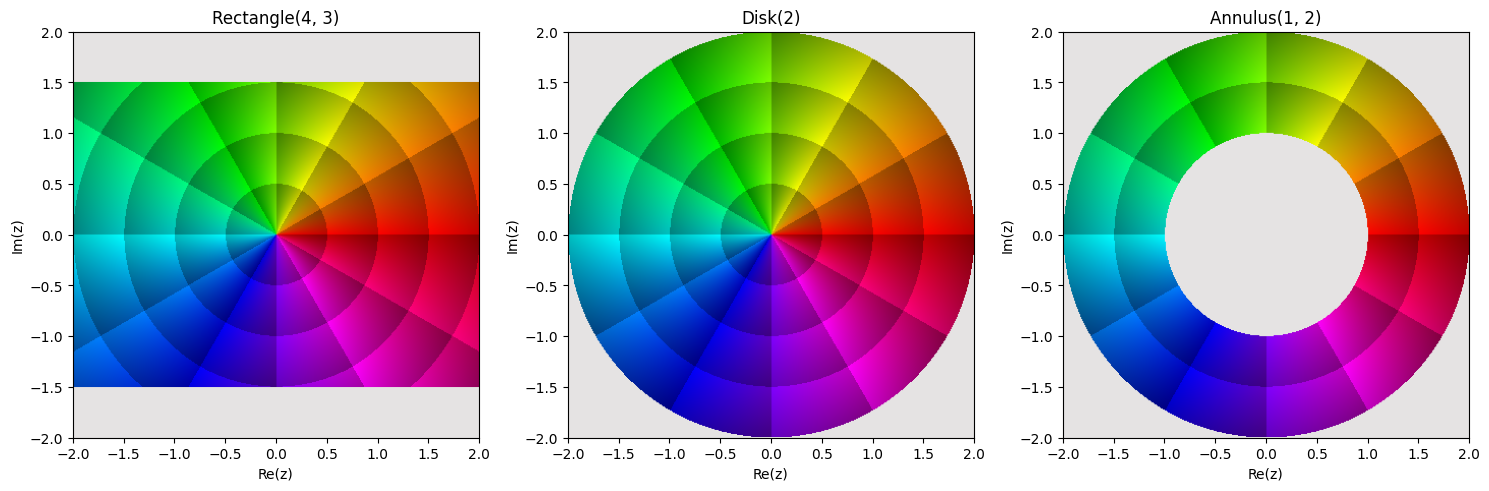

In [30]:
# Rectangle: defined by width and height
rect = cp.Rectangle(4, 3)  # 4 units wide, 3 units tall

# Disk: defined by radius
disk = cp.Disk(2)  # radius = 2

# Annulus: defined by inner and outer radii
annulus = cp.Annulus(1, 2)  # inner radius = 1, outer radius = 2

# Let's visualize these domains
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define a simple function for visualization
f = lambda z: z  # identity function shows the domain clearly

cp.plot(rect, f, ax=axes[0], title="Rectangle(4, 3)")
cp.plot(disk, f, ax=axes[1], title="Disk(2)")
cp.plot(annulus, f, ax=axes[2], title="Annulus(1, 2)")

plt.tight_layout()
plt.show()

### Domain Centers

By default, domains are centered at the origin. You can shift them to any point in the complex plane:

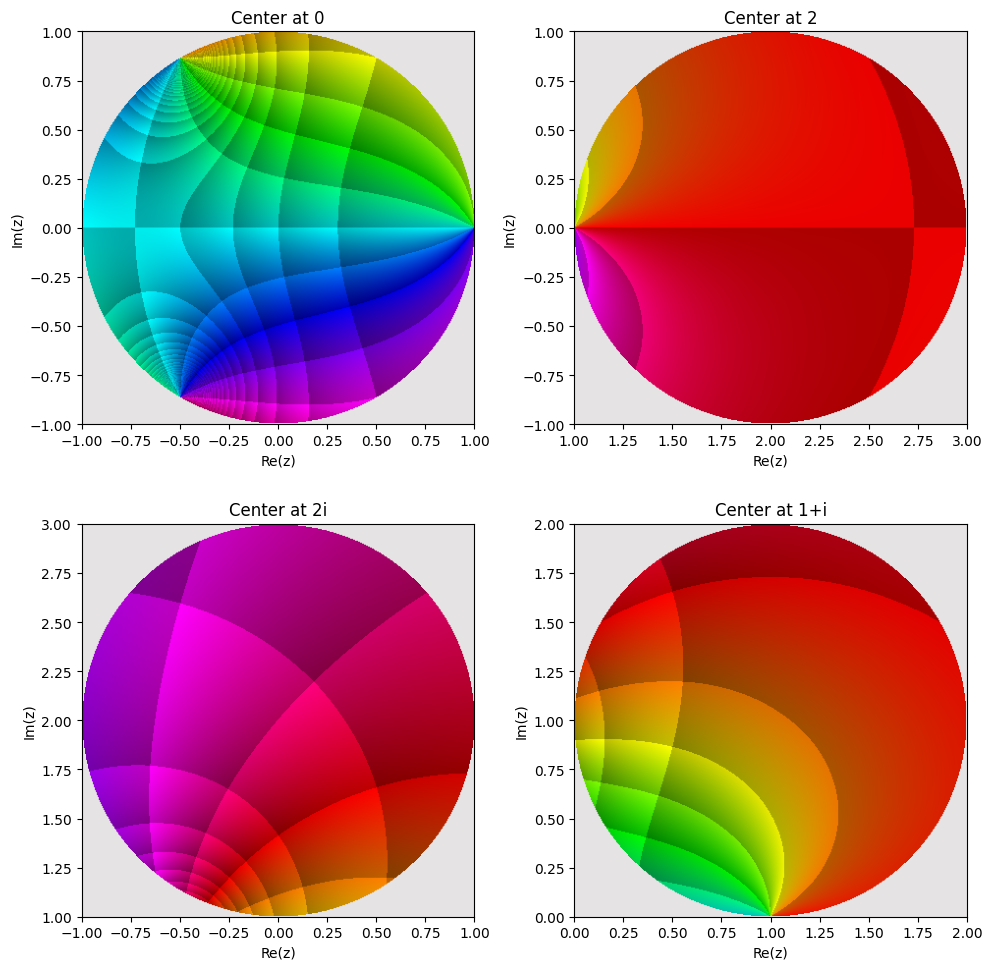

In [31]:
# Create domains at different centers
disk_origin = cp.Disk(1, center=0)  # at origin
disk_right = cp.Disk(1, center=2)   # at z = 2
disk_up = cp.Disk(1, center=2j)     # at z = 2i
disk_diagonal = cp.Disk(1, center=1+1j)  # at z = 1+i

# Visualize with a more interesting function
f = lambda z: (z - 1) / (z**2 + z + 1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

domains = [disk_origin, disk_right, disk_up, disk_diagonal]
titles = ["Center at 0", "Center at 2", "Center at 2i", "Center at 1+i"]

for ax, domain, title in zip(axes, domains, titles):
    cp.plot(domain, f, ax=ax, title=title, n=400)

plt.tight_layout()
plt.show()

### Understanding Domain Meshes

The mesh is the grid of complex numbers where the function is evaluated. Let's explore how it works:

5x5 mesh:
[[-1. -1.j  -0.5-1.j   0. -1.j   0.5-1.j   1. -1.j ]
 [-1. -0.5j -0.5-0.5j  0. -0.5j  0.5-0.5j  1. -0.5j]
 [-1. +0.j  -0.5+0.j   0. +0.j   0.5+0.j   1. +0.j ]
 [-1. +0.5j -0.5+0.5j  0. +0.5j  0.5+0.5j  1. +0.5j]
 [-1. +1.j  -0.5+1.j   0. +1.j   0.5+1.j   1. +1.j ]]

Shape: (5, 5)
Total points: 25


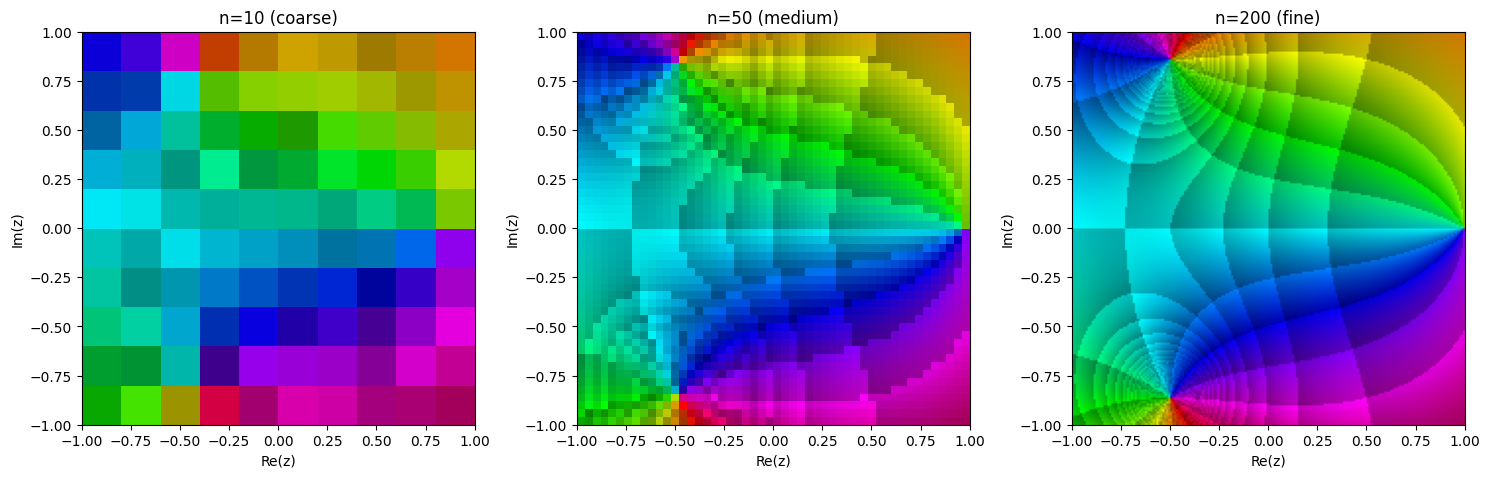

In [32]:
# Create a small domain for demonstration
small_rect = cp.Rectangle(2, 2)

# Generate meshes with different resolutions
mesh_5 = small_rect.mesh(5)   # 5x5 grid
mesh_10 = small_rect.mesh(10) # 10x10 grid

print("5x5 mesh:")
print(mesh_5)
print(f"\nShape: {mesh_5.shape}")
print(f"Total points: {mesh_5.size}")

# Visualize the effect of mesh resolution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, n, title in zip(axes, [10, 50, 200], ["n=10 (coarse)", "n=50 (medium)", "n=200 (fine)"]):
    cp.plot(small_rect, f, ax=ax, n=n, title=title)

plt.tight_layout()
plt.show()

### Viewing Windows: Square vs. Rectangular

By default, complexplorer uses square viewing windows for aesthetic reasons. You can override this behavior:

Natural window:
  Real: (-3.0, 3.0)
  Imag: (-1.0, 1.0)

Square window:
  Real: (-3.0, 3.0)
  Imag: (-3.0, 3.0)


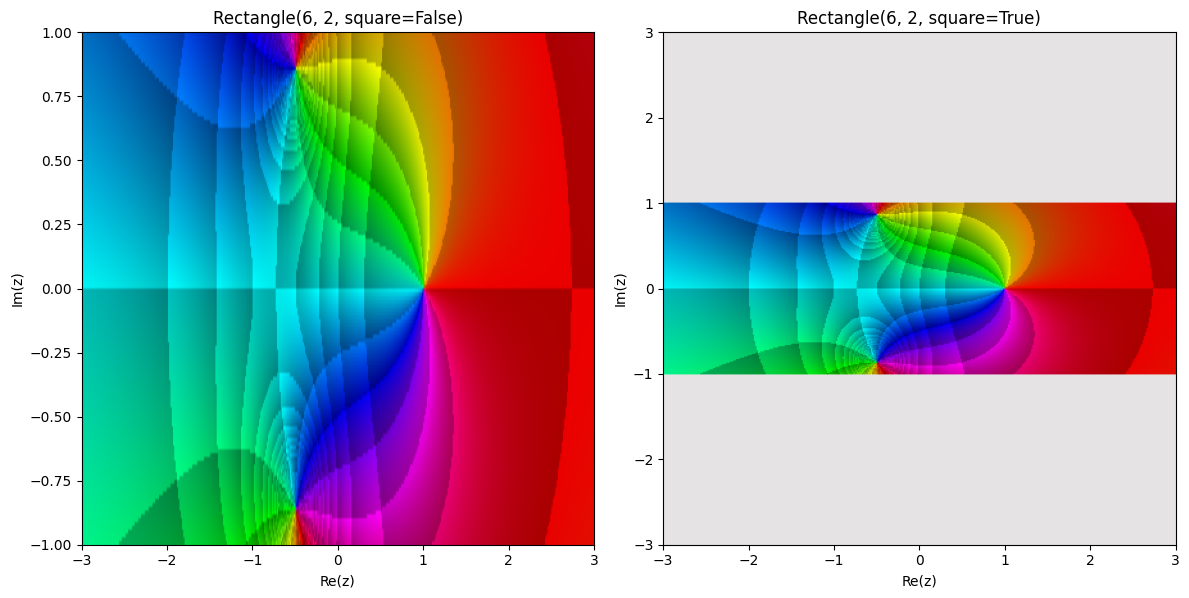

In [33]:
# Create rectangles with different aspect ratios
rect_wide = cp.Rectangle(6, 2, square=False)  # Natural aspect ratio
rect_wide_square = cp.Rectangle(6, 2, square=True)  # Forced square window

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cp.plot(rect_wide, f, ax=axes[0], title="Rectangle(6, 2, square=False)")
cp.plot(rect_wide_square, f, ax=axes[1], title="Rectangle(6, 2, square=True)")

# Print window information
print("Natural window:")
print(f"  Real: {rect_wide.window_real}")
print(f"  Imag: {rect_wide.window_imag}")
print("\nSquare window:")
print(f"  Real: {rect_wide_square.window_real}")
print(f"  Imag: {rect_wide_square.window_imag}")

plt.tight_layout()
plt.show()

## Part 2: Domain Composition

### Unions and Intersections

You can create complex domains by combining simpler ones:

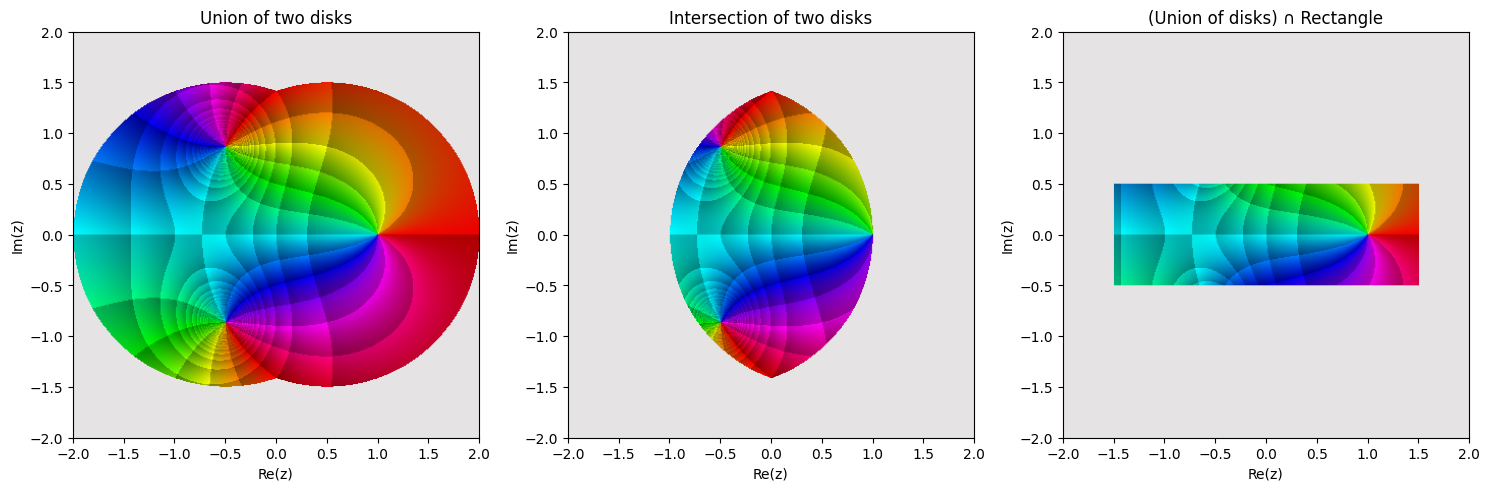

In [34]:
# Create overlapping disks
disk1 = cp.Disk(1.5, center=-0.5)
disk2 = cp.Disk(1.5, center=0.5)

# Union: points in either disk
union = disk1.union(disk2)

# Intersection: points in both disks
intersection = disk1.intersection(disk2)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cp.plot(union, f, ax=axes[0], title="Union of two disks")
cp.plot(intersection, f, ax=axes[1], title="Intersection of two disks")

# Create a more complex shape
rect = cp.Rectangle(3, 1)
complex_domain = union.intersection(rect)
cp.plot(complex_domain, f, ax=axes[2], title="(Union of disks) ∩ Rectangle")

plt.tight_layout()
plt.show()

### Creating Artistic Domains

Let's create some interesting patterns using domain composition:

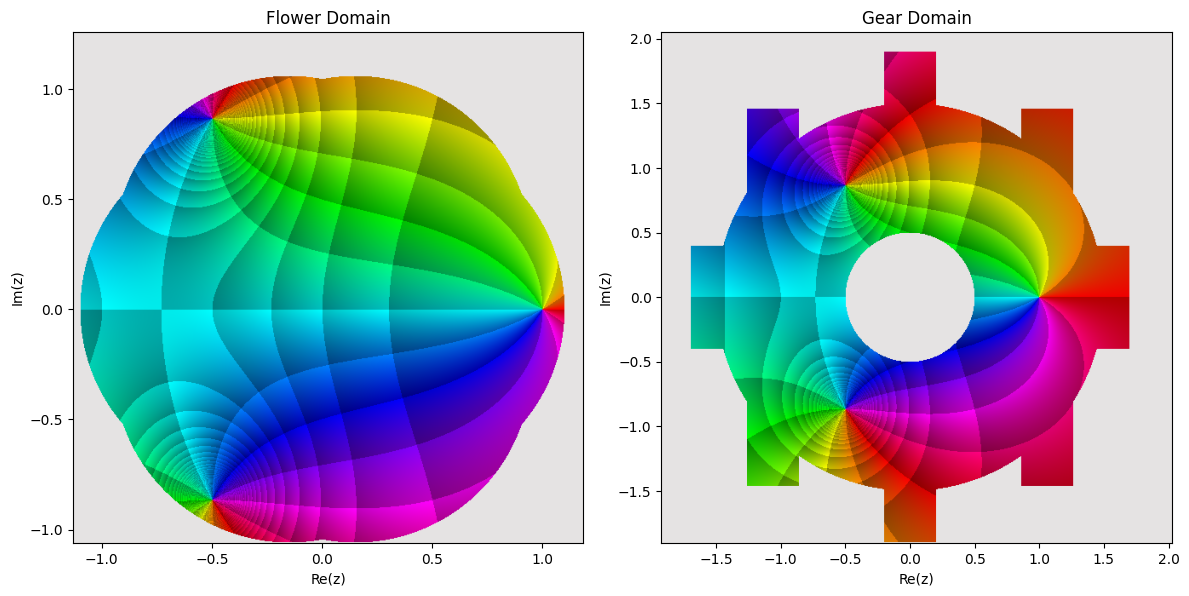

In [35]:
def create_flower_domain(n_petals=6, petal_radius=0.8, center_radius=0.3):
    """Create a flower-shaped domain."""
    # Start with central disk
    flower = cp.Disk(center_radius)
    
    # Add petals
    for k in range(n_petals):
        angle = 2 * np.pi * k / n_petals
        petal_center = center_radius * np.exp(1j * angle)
        petal = cp.Disk(petal_radius, center=petal_center)
        flower = flower.union(petal)
    
    return flower

def create_gear_domain(n_teeth=8, inner_radius=0.5, outer_radius=1.5):
    """Create a gear-shaped domain."""
    # Start with annulus
    gear = cp.Annulus(inner_radius, outer_radius)
    
    # Add teeth
    for k in range(n_teeth):
        angle = 2 * np.pi * k / n_teeth
        tooth_center = outer_radius * np.exp(1j * angle)
        tooth = cp.Rectangle(0.4, 0.8, center=tooth_center)
        gear = gear.union(tooth)
    
    return gear

# Create and visualize artistic domains
flower = create_flower_domain()
gear = create_gear_domain()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cp.plot(flower, f, ax=axes[0], title="Flower Domain", n=600)
cp.plot(gear, f, ax=axes[1], title="Gear Domain", n=600)

plt.tight_layout()
plt.show()

## Part 3: Color Maps

### Understanding Phase Portraits

Color maps in complexplorer convert complex values to colors. The most fundamental is the phase portrait, which maps the argument (angle) of a complex number to a color:

In [ ]:
# Create a domain for color map demonstrations
demo_domain = cp.Rectangle(4, 4)

# Basic phase portrait
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Different phase portrait configurations
configs = [
    (cp.Phase(), "Basic Phase Portrait"),
    (cp.Phase(n_phi=6), "Enhanced Phase (6 sectors)"),
    (cp.Phase(n_phi=12), "Enhanced Phase (12 sectors)"),
    (cp.Phase(r_linear_step=0.5), "Linear Modulus Enhancement"),
    (cp.Phase(r_log_base=2), "Logarithmic Modulus Enhancement"),
    (cp.Phase(n_phi=6, auto_scale_r=True), "Auto-scaled Enhancement")
]

for ax, (cmap, title) in zip(axes, configs):
    cp.plot(demo_domain, f, cmap=cmap, ax=ax, title=title, n=400)

plt.tight_layout()
plt.show()

### The v_base Parameter

The `v_base` parameter controls the darkness of enhancement lines:

### Auto-scaled Enhanced Phase Portraits

Auto-scaling creates visually square cells automatically by calculating the appropriate `r_linear_step` based on the number of phase sectors:

In [ ]:
# Comparing manual vs auto-scaled enhanced phase portraits
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Manual calculation (old way)
n_phi = 8
manual_r_step = 2 * np.pi / n_phi  # For square cells
cmap_manual = cp.Phase(n_phi=n_phi, r_linear_step=manual_r_step, v_base=0.4)

# Auto-scaled (new way)
cmap_auto = cp.Phase(n_phi=n_phi, auto_scale_r=True, v_base=0.4)

# Different scale_radius values
cmap_auto_small = cp.Phase(n_phi=n_phi, auto_scale_r=True, scale_radius=0.5, v_base=0.4)
cmap_auto_large = cp.Phase(n_phi=n_phi, auto_scale_r=True, scale_radius=1.5, v_base=0.4)

# Plot all variants
cp.plot(demo_domain, f, cmap=cmap_manual, ax=axes[0,0], 
        title=f"Manual: r_step={manual_r_step:.3f}", n=400)
cp.plot(demo_domain, f, cmap=cmap_auto, ax=axes[0,1], 
        title="Auto-scaled (default)", n=400)
cp.plot(demo_domain, f, cmap=cmap_auto_small, ax=axes[1,0], 
        title="Auto-scaled (scale_radius=0.5)", n=400)
cp.plot(demo_domain, f, cmap=cmap_auto_large, ax=axes[1,1], 
        title="Auto-scaled (scale_radius=1.5)", n=400)

plt.tight_layout()
plt.show()

print(f"Manual r_step: {manual_r_step:.6f}")
print(f"Auto r_step (default): {cmap_auto.r_linear_step:.6f}")
print(f"Auto r_step (scale=0.5): {cmap_auto_small.r_linear_step:.6f}")
print(f"Auto r_step (scale=1.5): {cmap_auto_large.r_linear_step:.6f}")

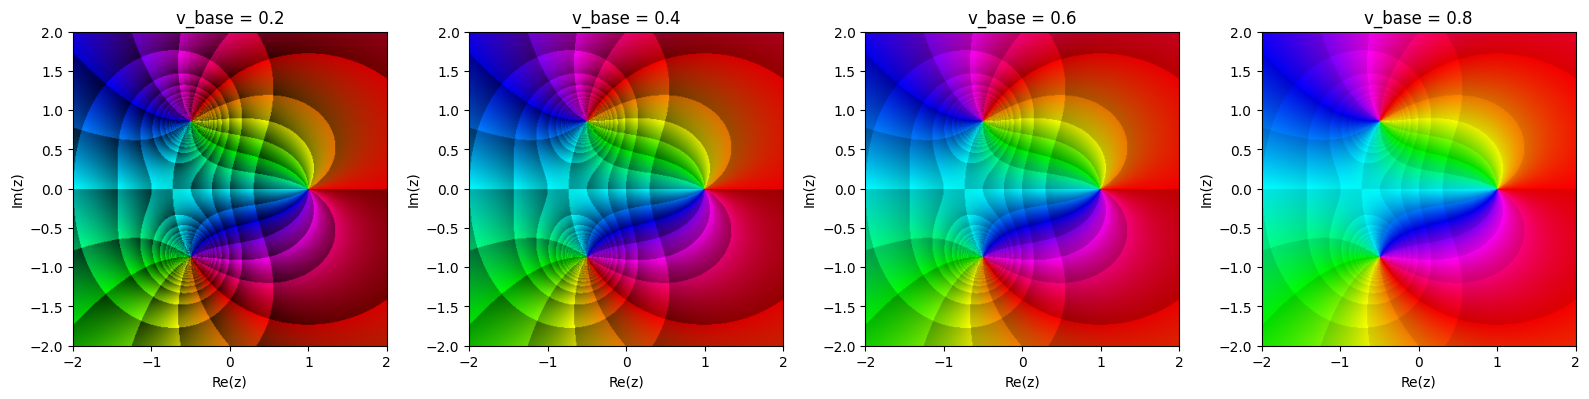

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

v_values = [0.2, 0.4, 0.6, 0.8]
for ax, v in zip(axes, v_values):
    cmap = cp.Phase(n_phi=6, r_linear_step=0.5, v_base=v)
    cp.plot(demo_domain, f, cmap=cmap, ax=ax, title=f"v_base = {v}", n=400)

plt.tight_layout()
plt.show()

### Chessboard Patterns

Chessboard patterns help visualize how functions transform grids:

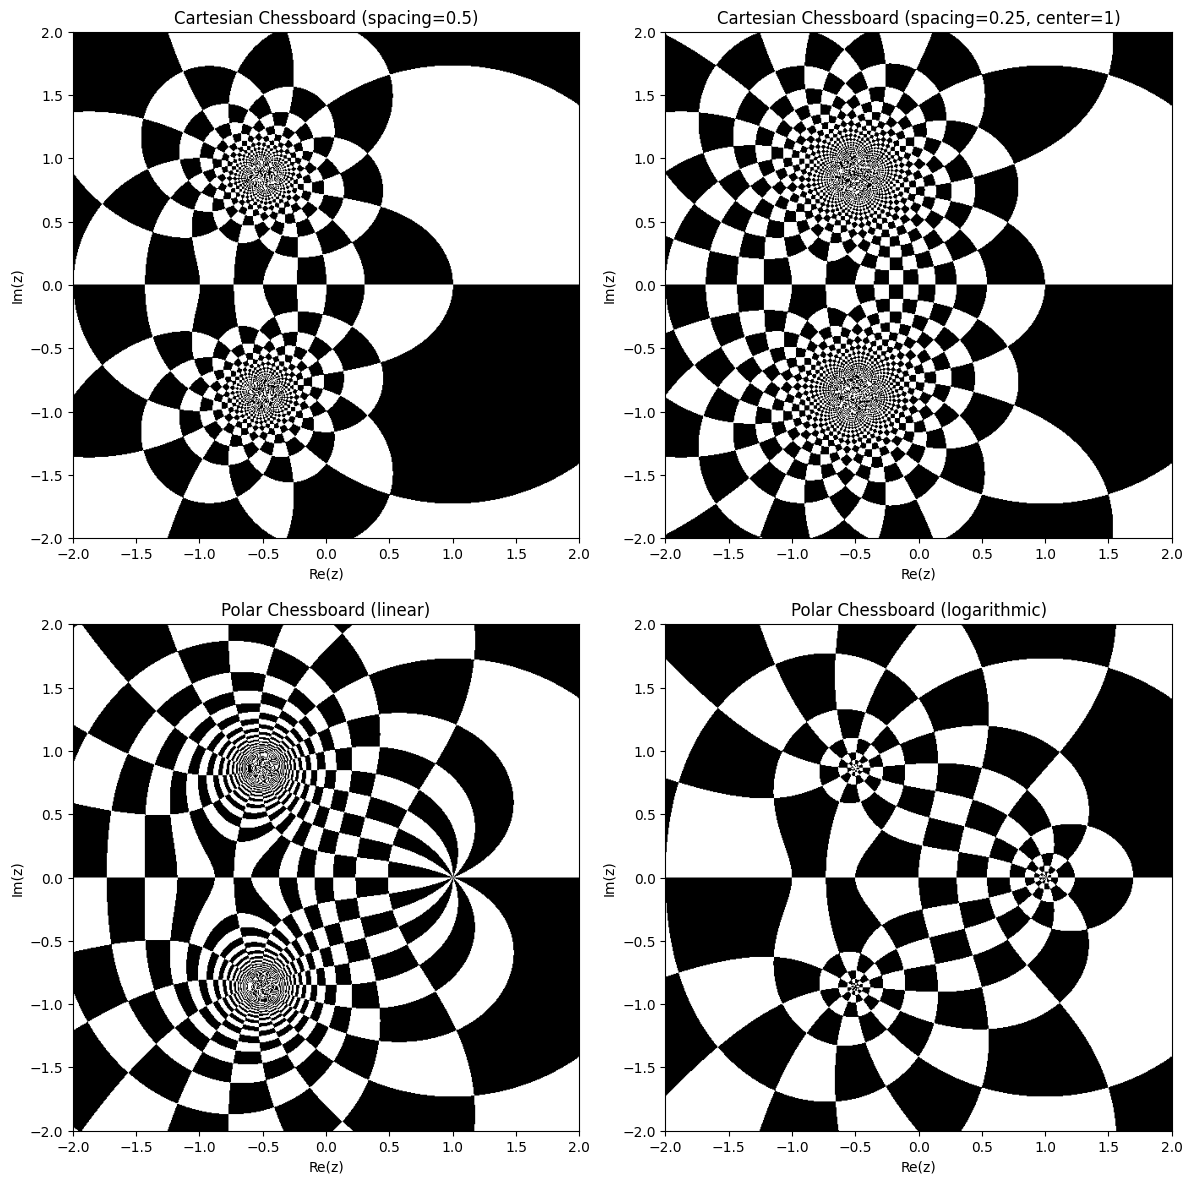

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Cartesian chessboard with different spacings
cp.plot(demo_domain, f, cmap=cp.Chessboard(spacing=0.5), 
        ax=axes[0,0], title="Cartesian Chessboard (spacing=0.5)", n=600)
cp.plot(demo_domain, f, cmap=cp.Chessboard(spacing=0.25, center=1), 
        ax=axes[0,1], title="Cartesian Chessboard (spacing=0.25, center=1)", n=600)

# Polar chessboard patterns
cp.plot(demo_domain, f, cmap=cp.PolarChessboard(n_phi=8, spacing=0.3), 
        ax=axes[1,0], title="Polar Chessboard (linear)", n=600)
cp.plot(demo_domain, f, cmap=cp.PolarChessboard(n_phi=6, r_log=2), 
        ax=axes[1,1], title="Polar Chessboard (logarithmic)", n=600)

plt.tight_layout()
plt.show()

### Logarithmic Rings

LogRings create concentric circles that help visualize the modulus of complex functions:

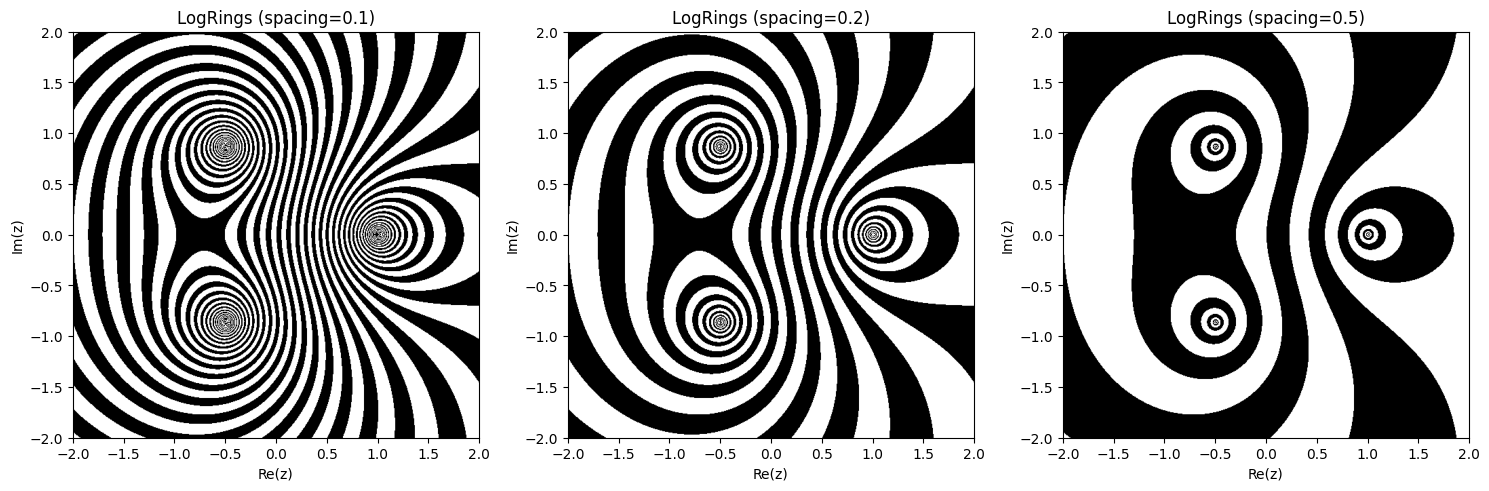

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different log spacings
spacings = [0.1, 0.2, 0.5]
for ax, spacing in zip(axes, spacings):
    cp.plot(demo_domain, f, cmap=cp.LogRings(log_spacing=spacing), 
            ax=ax, title=f"LogRings (spacing={spacing})", n=600)

plt.tight_layout()
plt.show()

## Part 4: Advanced Techniques

### Custom Out-of-Domain Colors

You can customize how regions outside the domain appear:

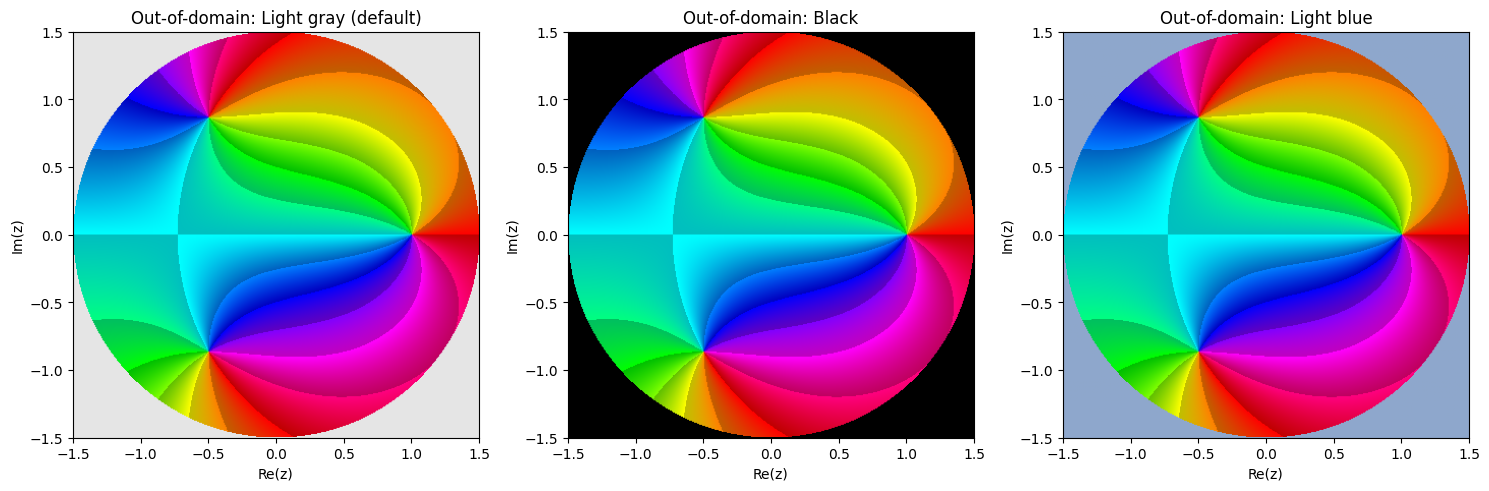

In [40]:
# Create a small domain to show out-of-domain regions
small_disk = cp.Disk(1.5)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different out-of-domain colors (HSV format)
colors = [
    ((0, 0, 0.9), "Light gray (default)"),
    ((0, 0, 0), "Black"),
    ((0.6, 0.3, 0.8), "Light blue")
]

for ax, (color, name) in zip(axes, colors):
    cmap = cp.Phase(n_phi=6, out_of_domain_hsv=color)
    cp.plot(small_disk, f, cmap=cmap, ax=ax, title=f"Out-of-domain: {name}", n=400)

plt.tight_layout()
plt.show()

### Combining Domains and Color Maps for Analysis

Let's analyze a function with poles and zeros using different visualization techniques:

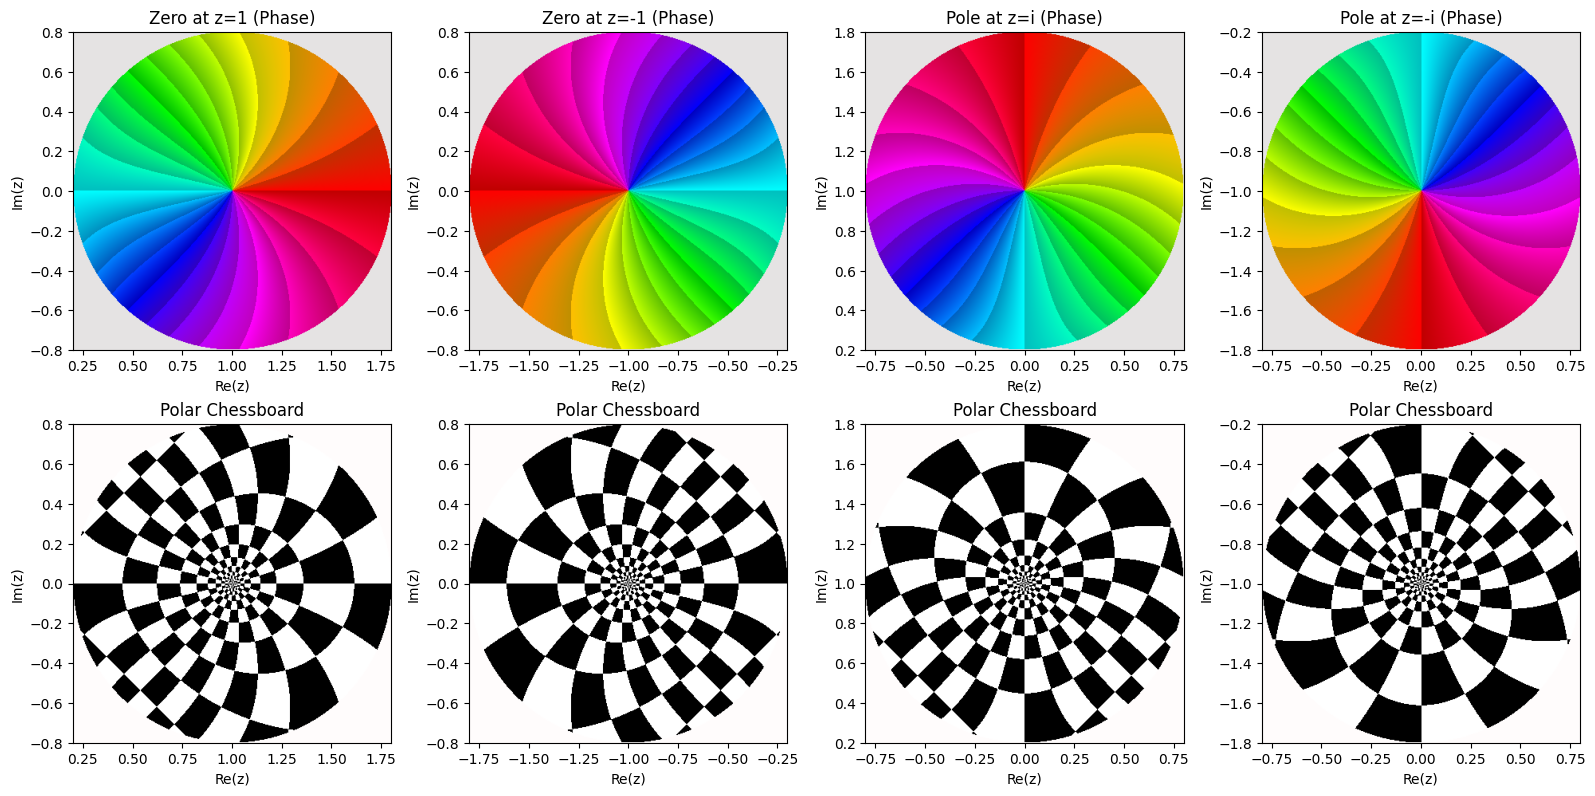

In [41]:
# Function with known zeros and poles
# Zeros at z = 1, z = -1
# Poles at z = i, z = -i
g = lambda z: (z**2 - 1) / (z**2 + 1)

# Create domains around critical points
domain_zero1 = cp.Disk(0.8, center=1)
domain_zero2 = cp.Disk(0.8, center=-1)
domain_pole1 = cp.Disk(0.8, center=1j)
domain_pole2 = cp.Disk(0.8, center=-1j)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Analyze each critical point with different color maps
domains = [domain_zero1, domain_zero2, domain_pole1, domain_pole2]
titles = ["Zero at z=1", "Zero at z=-1", "Pole at z=i", "Pole at z=-i"]

# Phase portrait
for i, (domain, title) in enumerate(zip(domains, titles)):
    cp.plot(domain, g, cmap=cp.Phase(n_phi=12), ax=axes[0,i], 
            title=title + " (Phase)", n=400)

# Polar chessboard
for i, domain in enumerate(domains):
    cp.plot(domain, g, cmap=cp.PolarChessboard(n_phi=12, r_log=1.5), 
            ax=axes[1,i], title="Polar Chessboard", n=400)

plt.tight_layout()
plt.show()

## Summary and Best Practices

### Domain Selection
- Use **Rectangle** for general exploration
- Use **Disk** to focus on behavior around a point
- Use **Annulus** to exclude singularities at the center
- Combine domains for complex regions

### Color Map Selection
- **Phase portraits**: Best for understanding zeros, poles, and branch cuts
- **Chessboard patterns**: Great for visualizing conformal properties
- **LogRings**: Excellent for understanding growth rates

### Performance Tips
- Start with low `n` values (100-200) for exploration
- Increase to 400-600 for publication-quality images
- Use domain composition sparingly for 3D plots (computationally expensive)

### Next Steps
- Experiment with your own functions
- Try creating custom domain shapes
- Combine multiple visualizations to gain deeper insights
- See the [gallery](../docs/gallery/README.md) for more examples!